# PW3

In [1]:
import cv2

In [5]:
# Read the images using cv2.imread
img1 = cv2.imread('.\Data\dog_backpack.png')
img2 = cv2.imread('.\Data\watermark_no_copy.png')

In [6]:
# verify the shape of img1
print(img1.shape)

(1401, 934, 3)


In [7]:
# verify the shape of img2
print(img2.shape)

(1280, 1277, 3)


In [12]:
import matplotlib.pyplot as plt

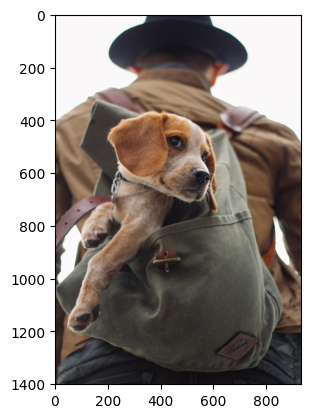

In [11]:
# plot img1
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

Whoops! Let's remember to fix the RGB!

In [13]:
# fix the color distribition
img1_fixed = img1.copy()

# Convert to RGB
img1_fixed = cv2.cvtColor(img1_fixed, cv2.COLOR_BGR2RGB)

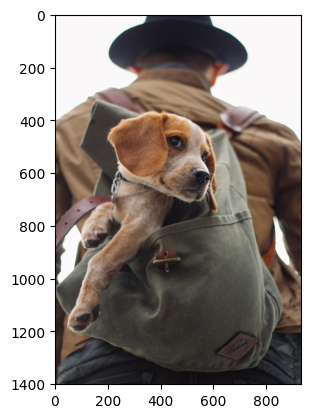

In [14]:
# plot img1 again
plt.imshow(img1_fixed)
plt.show()

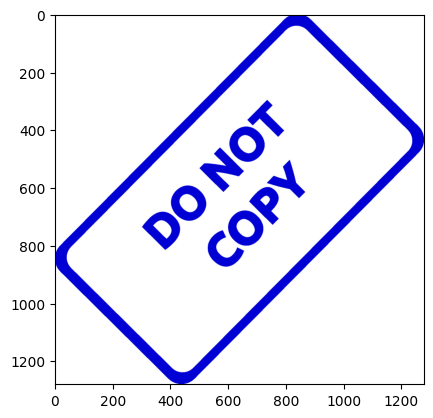

In [15]:
# plot img2
plt.imshow(img2)
plt.show()

### Resizing the Images

In [16]:
# Resize img1 to (1200, 1200)
img1_resized = cv2.resize(img1_fixed, (1200, 1200))

# Resize img2 to (1200, 1200)
img2_resized = cv2.resize(img2, (1200, 1200))

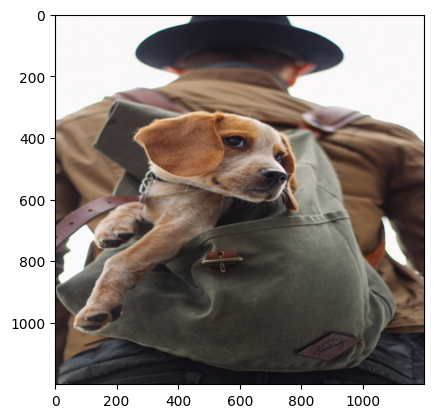

In [17]:
# plot img1
plt.imshow(img1_resized)
plt.show()

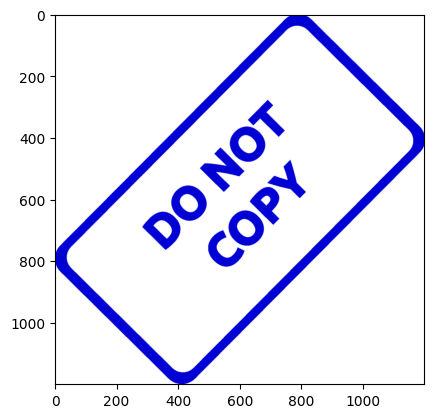

In [18]:
# plot img2
plt.imshow(img2_resized)
plt.show()

### Blending the Image

We will blend the values together with the formula:

$$  img1 * \alpha  + img2 * \beta  + \gamma $$

In [19]:
# img1: shape
print(img1_resized.shape)

(1200, 1200, 3)


In [20]:
# img2: shape
print(img2_resized.shape)

(1200, 1200, 3)


In [21]:
# Blend img1 and img2 with: alpha=0.7, beta=0.3, gamma=0
blended = cv2.addWeighted(img1_resized, 0.7, img2_resized, 0.3, 0)

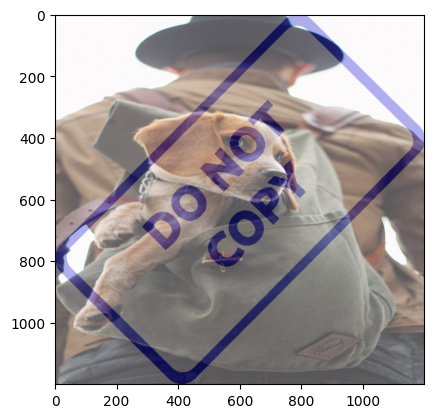

In [22]:
# plot blended image
plt.imshow(blended)
plt.show()

-----

## Overlaying Images of Different Sizes

We can use this quick trick to quickly overlap different sized images, by simply reassigning the larger image's values to match the smaller image.

In [24]:
# Load two images
# Read the images using cv2.imread
img1 = cv2.imread('.\Data\dog_backpack.png')
img2 = cv2.imread('.\Data\watermark_no_copy.png')

#resize img2 (600,600)
small_img_resized = cv2.resize(img2, (600, 600))

#fix colors distribution of img1  
img1_fixed = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

#fix colors distribution of img2  
img2_fixed = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)
 
large_img = img1
small_img_resized = small_img_resized

In [25]:
x_offset=0
y_offset=0

In [26]:
# Set the region of interest (ROI) for resized img2
roi = large_img[y_offset:y_offset+small_img_resized.shape[0], x_offset:x_offset+small_img_resized.shape[1]]

# Overlay resized img2 onto img1 at the top-left corner
large_img[y_offset:y_offset+small_img_resized.shape[0], x_offset:x_offset+small_img_resized.shape[1]] = small_img_resized[:roi.shape[0], :roi.shape[1]]

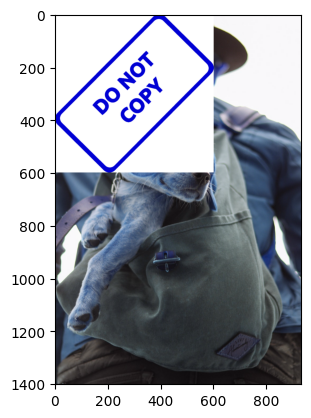

In [27]:
plt.imshow(large_img)

________
_______

## Blending Images of Different Sizes

### Imports

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Importing the images again and resizing

In [29]:
# Load two images
# Read the images using cv2.imread
img1 = cv2.imread('.\Data\dog_backpack.png')
img2 = cv2.imread('.\Data\watermark_no_copy.png')

# Resize img2
img2_resized = cv2.resize(img2, (600, 600))

# Color Distribution
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_resized = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB)

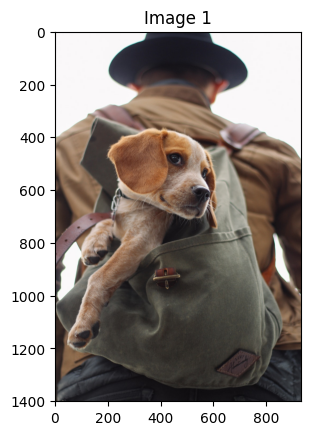

In [30]:
#plot img1   
plt.imshow(img1)
plt.title('Image 1')
plt.show()

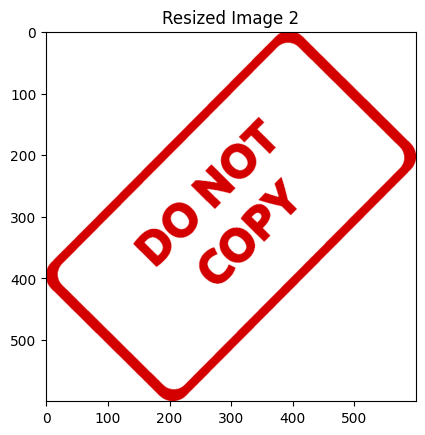

In [31]:
#plot img2   
plt.imshow(img2_resized)
plt.title('Resized Image 2')
plt.show()

### Create a Region of Interest (ROI)

In [32]:
print(img1.shape)

(1401, 934, 3)


In [33]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [34]:
# Creating an ROI of the same size of the foreground image (smaller image that will go on top)
rows, cols, channels = img2.shape
roi = img1[y_offset:y_offset+rows, x_offset:x_offset+cols]  # BOTTOM RIGHT CORNER

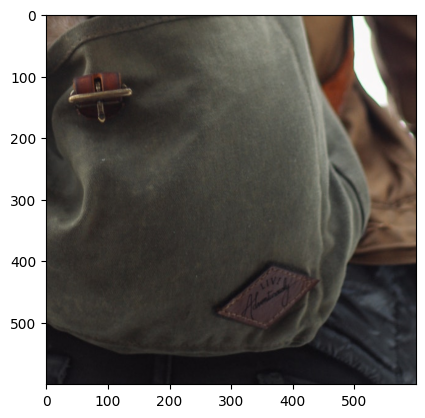

In [35]:
plt.imshow(roi)
plt.show()

In [36]:
# roi shape
print(roi.shape)

(600, 600, 3)


### Creating a Mask

In [49]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

In [38]:
#img2gray shape
print(img2gray.shape)

(600, 600)


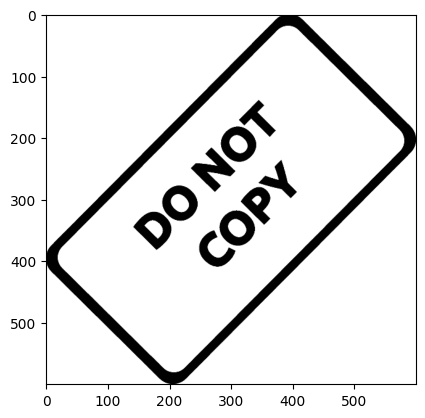

In [39]:
# plot img2gray (cmap='gray')
plt.imshow(img2gray, cmap='gray')
plt.show()

In [55]:
# Use bitwise_not function to invert img2gray image
mask_inv = cv2.bitwise_not(img2gray)

In [56]:
# mask_inv shape
print(mask_inv.shape)

(600, 600)


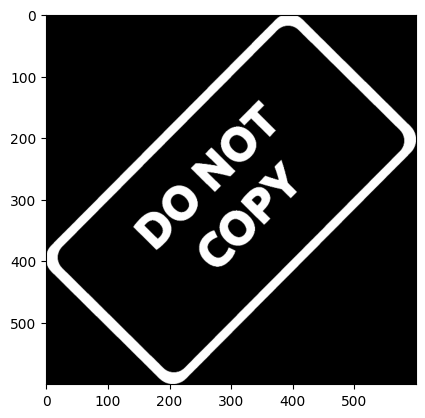

In [57]:
# plot mask_inv, cmap='gray'
plt.imshow(mask_inv, cmap='gray')
plt.show()

## Convert Mask to have 3 channels

In [50]:
# Create a white background image of the same size as img2
white_background = np.full(img2_resized.shape, 255, dtype=np.uint8)

In [61]:
# Use bitwise_or to add two layers on mask_inv image
mask_inv = cv2.bitwise_not(img2gray)

In [62]:
# bk shape
print(mask_inv.shape)

(600, 600)


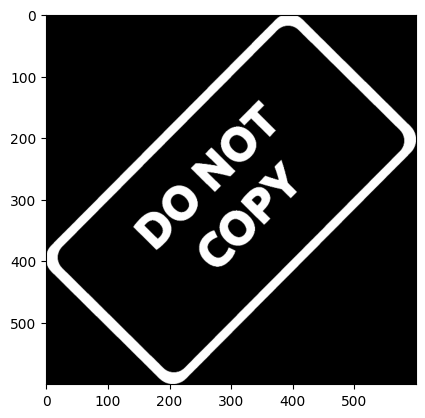

In [63]:
# Plot bk
plt.imshow(mask_inv, cmap='gray')
plt.show()

### Grab Original FG image and place on top of Mask

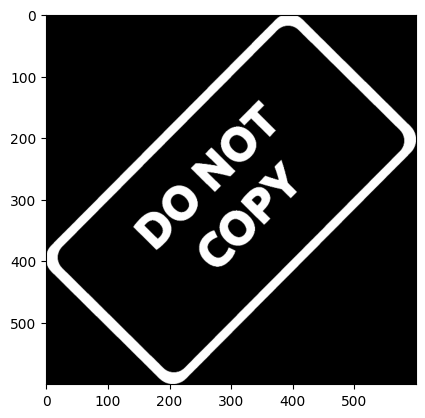

In [64]:
plt.imshow(mask_inv,cmap='gray')

In [66]:
# Grab Original FG image and place on top of Mask
fg = cv2.bitwise_and(img2_resized, cv2.cvtColor(mask_inv, cv2.COLOR_GRAY2BGR))

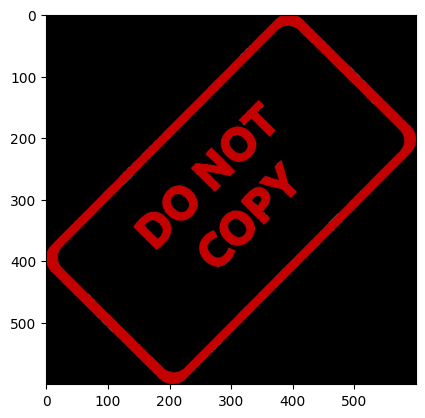

In [67]:
plt.imshow(fg)

In [87]:
print(fg.shape)

(600, 600, 3)


### Get ROI and blend in the mask with the ROI

In [68]:
final_roi = cv2.bitwise_or(roi, fg)

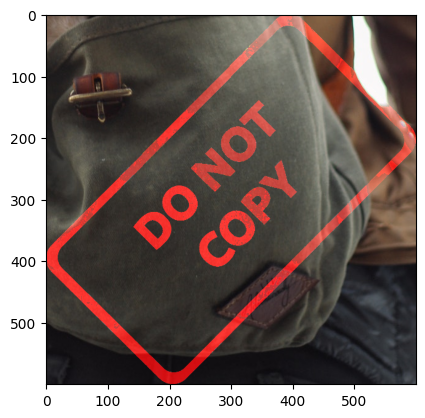

In [69]:
# Plot the final_roi
plt.imshow(final_roi)
plt.show()

### Now add in the rest of the image

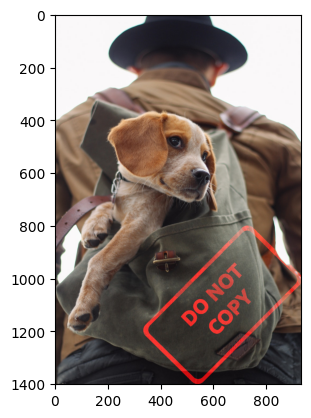

In [70]:
large_img = img1
small_img = final_roi

# Add in the rest of the image
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

# Plot combined image
plt.imshow(large_img)
plt.show()

In [91]:
# Save this image in your PC
cv2.imwrite('combined_image.png', cv2.cvtColor(large_img, cv2.COLOR_RGB2BGR))

True

### Great Work!

Check out these documentation examples and links for more help for these kinds of tasks (which can be really tricky!)

1. https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
2. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
3. https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html

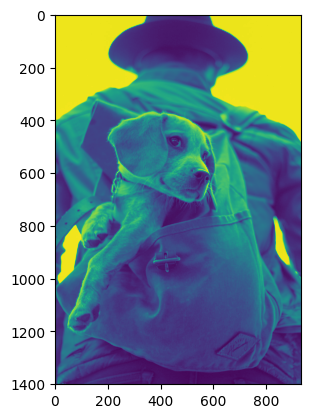

In [71]:
#pay attention, if your image is not a RGB image, cv.coclor_BGR2GRAY will not work correctely
import cv2 as cv
# Read the images
img1 = cv2.imread('.\Data\dog_backpack.png')

#im_color = cv.imread("lena.png", cv.IMREAD_COLOR)
im_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

plt.imshow(im_gray)


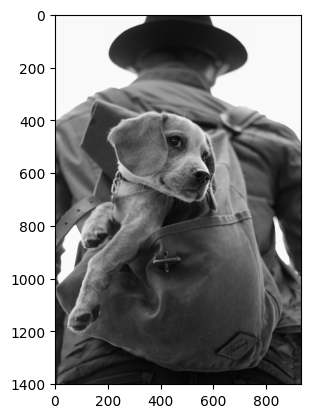

In [72]:
import cv2
import matplotlib.pyplot as plt

# Read the image using cv2.imread
img1 = cv2.imread('.\Data\dog_backpack.png')

# Convert image to grayscale if it has 3 channels
if len(img1.shape) == 3 and img1.shape[2] == 3:
    img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    plt.imshow(img_gray, cmap='gray')
    plt.show()
else:
    print("Image is not in BGR format.")
